# importing the data

In [ ]:
# https://drive.google.com/drive/folders/1P0fxjEi2w5dfQPTXMlJaqILYLwqJu1vy?usp=sharing

In [ ]:
!cp -r "/content/drive/MyDrive/DO NOT DELETE/IEEE enetcom/data" /content

In [1]:
!pip install opencv-python matplotlib sklearn

  Using cached opencv_python-4.5.5.64-cp36-abi3-win_amd64.whl (35.4 MB)
  Using cached sklearn-0.0-py2.py3-none-any.whl


In [2]:
import cv2
import os 
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight 
from keras.layers import Input , Conv2D , BatchNormalization , MaxPooling2D , Dropout , Flatten , Dense , GlobalAveragePooling2D
from keras.models import Sequential
from keras.applications.mobilenet_v2 import MobileNetV2

# loading the data from a folder to the code 

In [2]:
for parent,_,content in os.walk("data/yes"):
  for i in content : 
    p = os.path.join(parent,i)
    img = cv2.imread(p)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img_normalized = gray /255
    img_resized = cv2.resize(img,(630,630))
    plt.imshow(img_resized,cmap='gray')
    break

In [3]:
parent = "C:/Users/hhich/OneDrive/Desktop/folder/data"

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=10,
                                     width_shift_range=0.05,
                                     height_shift_range=0.05,
                                     zoom_range=0.05,
                                     horizontal_flip=True, 
                                     vertical_flip=True,
                                     brightness_range = [0.5, 1.4],
                                     validation_split=0.2)

train_generator = train_datagen.flow_from_directory(directory=parent,
                                                    batch_size=10,
                                                    target_size=(224, 224),
                                                    shuffle = True,
                                                    class_mode = "binary",
                                                    subset = "training")

validation_generator = train_datagen.flow_from_directory(directory=parent,
                                                            batch_size=10,
                                                            target_size=(224, 224),
                                                            shuffle = False,
                                                            class_mode = "binary",
                                                            subset = "validation")

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


# creating the AI 

In [5]:
model = Sequential([ 
      Conv2D(filters = 64 , kernel_size = (3,3), activation="relu", input_shape=(224,224,3)),
      MaxPooling2D(pool_size = (3,3)),
      Conv2D(filters = 32 , kernel_size = (3,3), activation="relu"),
      MaxPooling2D(pool_size = (3,3)),
      Conv2D(filters = 32 , kernel_size = (3,3), activation="relu"),
      MaxPooling2D(pool_size = (3,3)),
      Flatten(),
      Dense(units = 512 , activation="relu"),
      Dropout(rate = 0.5),
      Dense(units = 1 , activation="sigmoid")
  ])

In [6]:
import tensorflow as tf

model.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.00008),
                loss = "binary_crossentropy",
                metrics=["accuracy"])

In [ ]:
history1 = model.fit(train_generator,epochs = 20, validation_data = validation_generator )

Epoch 1/20


In [ ]:
model.evaluate(validation_generator)

5/5 [==============================] - 1s 168ms/step - loss: 0.5220 - accuracy: 0.7400


[0.5219982266426086, 0.7400000095367432]

# training the second model 

In [ ]:
base_model = MobileNetV2(input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

model2 = tf.keras.Sequential([
                              base_model,
                              GlobalAveragePooling2D(),
                              Dense(1024, activation = 'relu'),
                              Dropout(rate = 0.2),
                              Dense(1, activation='sigmoid')
                            ])

model2.compile(optimizer = tf.optimizers.Adam(learning_rate = 0.00008),
                loss = "binary_crossentropy",
                metrics=["accuracy"])

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
history2 = model2.fit(train_generator,epochs = 20, validation_data = validation_generator)

Epoch 1/20
21/21 [==============================] - 9s 258ms/step - loss: 0.6246 - accuracy: 0.6404 - val_loss: 0.4072 - val_accuracy: 0.8400
Epoch 2/20
21/21 [==============================] - 4s 206ms/step - loss: 0.4299 - accuracy: 0.8177 - val_loss: 0.3201 - val_accuracy: 0.8800
Epoch 3/20
21/21 [==============================] - 6s 298ms/step - loss: 0.3671 - accuracy: 0.8670 - val_loss: 0.3046 - val_accuracy: 0.9200
Epoch 4/20
21/21 [==============================] - 4s 203ms/step - loss: 0.3099 - accuracy: 0.9015 - val_loss: 0.2278 - val_accuracy: 0.9000
Epoch 5/20
21/21 [==============================] - 4s 204ms/step - loss: 0.3088 - accuracy: 0.8818 - val_loss: 0.2260 - val_accuracy: 0.9400
Epoch 6/20
21/21 [==============================] - 4s 204ms/step - loss: 0.2600 - accuracy: 0.9064 - val_loss: 0.2106 - val_accuracy: 0.9400
Epoch 7/20
21/21 [==============================] - 4s 208ms/step - loss: 0.2587 - accuracy: 0.9113 - val_loss: 0.2153 - val_accuracy: 0.9400
Epoch 

In [ ]:
model2.evaluate(validation_generator)

5/5 [==============================] - 1s 153ms/step - loss: 0.1551 - accuracy: 0.9600


[0.15514636039733887, 0.9599999785423279]

# checking the performance 

## accuracy 

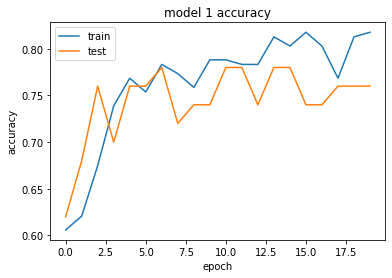

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model 1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

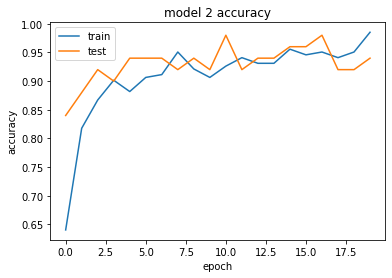

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model 2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

## loss 

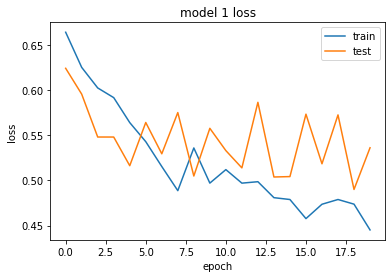

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

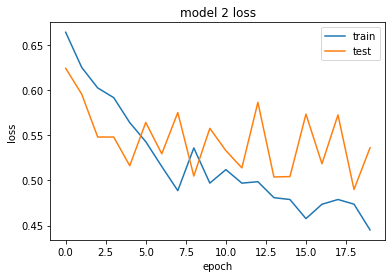

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model 2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()